<p style="font-size:78px">Final Project IRWA (2024-2025)</p>

<p style="font-size:48px">Part 2: Indexing and Evaluation</p>

In [1]:
# Standard library imports
import os
import sys

# Third-party imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score
from sklearn.manifold import TSNE
from gensim.models.word2vec import Word2Vec

# Local application imports
current_dir = os.path.dirname(os.path.abspath(__file__)) if '__file__' in locals() else os.getcwd()
project_root = os.path.join(current_dir, '..')
if project_root not in sys.path:
    sys.path.append(project_root)
import irwa.loading as ild 
import irwa.preprocessing as ipp
import irwa.indexing as ind
import irwa.ranking as irk
import irwa.evaluation as eva



# The following lines allow for autoreload of modules. They allow changes in modules without the need to reload the kernel.
#%load_ext autoreload
#%autoreload 2

# 0) Loading and Preprocessing

In [2]:
# Loading
file_path = '../data/farmers-protest-tweets.json'
tweets = ild.load_tweets_from_json(file_path)
print(f"Loaded {len(tweets)} tweets")

# Preprocessing
tweet_document_ids_map_df = "../data/tweet_document_ids_map.csv"
docid_to_tweetid, token_tweets = ipp.create_tokenized_dictionary(tweets, tweet_document_ids_map_df)
print(f"Loaded {len(token_tweets)} documents with their corresponding tokenized tweet content")

Loaded 117407 tweets
Loaded 48429 documents with their corresponding tokenized tweet content


# 1) Indexing

In [3]:
# Create inverted index
inverted_index, tf, idf = ind.create_inverted_index_tf_idf(token_tweets)

In [4]:
# Definition of test queries
query1 = "What is the indian protest?"          
query2 = "Where to support the farmers?"        
query3 = "Who are the Delhi farmers?"          
query4 = "Is the government corrupt?"       
query5 = "What do farmers fight for?"     

#### Query 1: What is the indian protest?

In [5]:
# Ranking results with TF-IDF
ranked_documents_1 = irk.rank_documents(ipp.build_terms(query1), token_tweets, inverted_index, tf, idf, filter=irk.conjunctive_filtering)
irk.display_scores_tf_idf(ranked_documents_1, docid_to_tweetid, tweets, 5)


Top 5 Results:
------------------------------------------------------------
RESULT 1
Document doc_34729: 5.031061026856039
Content: Indian farmers' protests: Why they matter to British Indians
#FarmersProtest  https://t.co/kyCWnDVyEm
------------------------------------------------------------
RESULT 2
Document doc_19653: 4.865420574825832
Content: @PunYaab Farmers are Indian ... Each n every person in protest is Indian first ... So think before tweets against protesters 

#farmersprotest
------------------------------------------------------------
RESULT 3
Document doc_33904: 4.592709354323596
Content: Indian farmers' protests: Why they matter to British Indians

#FarmersStandingFirm #FarmersProtest #StandWithFarmers 

https://t.co/ywgPhLCvm9
------------------------------------------------------------
RESULT 4
Document doc_9676: 4.485696129303427
Content: This is why Indian Farmers are protesting #FarmersProtest https://t.co/9mzFBGQaXL
------------------------------------------------

#### Query 2: Where to support the farmers?

In [6]:
# Ranking results with TF-IDF
ranked_documents_2 = irk.rank_documents(ipp.build_terms(query2), token_tweets, inverted_index, tf, idf, filter=irk.conjunctive_filtering)
irk.display_scores_tf_idf(ranked_documents_2, docid_to_tweetid, tweets, 5)


Top 5 Results:
------------------------------------------------------------
RESULT 1
Document doc_43187: 3.0634840969604533
Content: Support farmers support farmers support Twitter #FarmersProtest  #RepealOnlyWayAhead https://t.co/zfRr9uMx8k
------------------------------------------------------------
RESULT 2
Document doc_38864: 3.022813088119693
Content: support farmers support #FarmersProtest 
#शहीद_जवान_शहीद_किसा
------------------------------------------------------------
RESULT 3
Document doc_31878: 3.022813088119693
Content: Support farmers, support humanity #Farmersprotest
------------------------------------------------------------
RESULT 4
Document doc_47382: 2.8275827299999996
Content: We Support farmers
#MahapanchayatRevolution
#FarmersProtest
Support https://t.co/NO7xBeVg9f
------------------------------------------------------------
RESULT 5
Document doc_47423: 2.8275827299999996
Content: Support farmers
#MahapanchayatRevolution
#FarmersProtest
Support https://t.co/b6Ipb8

#### Query 3: Who are the Delhi farmers?

In [7]:
# Ranking results with TF-IDF
ranked_documents_3 = irk.rank_documents(ipp.build_terms(query3), token_tweets, inverted_index, tf, idf, filter=irk.conjunctive_filtering)
irk.display_scores_tf_idf(ranked_documents_3, docid_to_tweetid, tweets, 5)

Top 5 Results:
------------------------------------------------------------
RESULT 1
Document doc_14534: 5.015985867835725
Content: Farmers are in Delhi for their rights, Delhi Police consider them as your fellow countrymen. #DPstopIntimidatingFarmers 
#FarmersProtest https://t.co/9VqzgkG0Sr
------------------------------------------------------------
RESULT 2
Document doc_29928: 5.006789617141349
Content: Today, the 82nd day of the 'Delhi Chalo' demonstrations at New Delhi boundary areas. A sit-in protest along the Delhi border is being staged by thousands of farmers, 

#FarmersProtest  #DelhiChalo  #ProtestTopStories

https://t.co/O67STnJJ0M
------------------------------------------------------------
RESULT 3
Document doc_30534: 4.669628714307381
Content: Sadly he could not see the lakhs of farmers protesting outside Delhi when he was flying out of Delhi .

#IamAgainstModiGovt 
#FarmersProtest https://t.co/UDuCBv5aMg
------------------------------------------------------------
RESUL

#### Query 4: Is the government corrupt?

In [11]:
# Ranking results with TF-IDF
ranked_documents_4 = irk.rank_documents(ipp.build_terms(query4), token_tweets, inverted_index, tf, idf, filter=irk.conjunctive_filtering)
irk.display_scores_tf_idf(ranked_documents_4, docid_to_tweetid, tweets, 5)


Top 5 Results:
------------------------------------------------------------
RESULT 1
Document doc_14701: 12.3693229312849
Content: Corruption Corruption thats what this Government will be Remembered for #DPstopIntimidatingFarmers
#FarmersProtest https://t.co/7QsxGwbWmr
------------------------------------------------------------
RESULT 2
Document doc_14671: 11.793686669277783
Content: #MSP_किसान_का_हक 
Corruption Corruption thats what this Government will be Remembered for #DPstopIntimidatingFarmers
#FarmersProtest https://t.co/aTNdwitLS9
------------------------------------------------------------
RESULT 3
Document doc_14680: 10.848613870281753
Content: Corruption Corruption thats what this Government will be Remembered for #DPstopIntimidatingFarmers
#FarmersProtest https://t.co/Oxe9SDB01w
#DPstopIntimidatingFarmers
------------------------------------------------------------
RESULT 4
Document doc_37261: 7.558618628101222
Content: @rihanna Shame on India fake media and corrupt governm

#### Query 5: What do farmers fight for?

In [10]:
# Ranking results with TF-IDF
ranked_documents_5 = irk.rank_documents(ipp.build_terms(query5), token_tweets, inverted_index, tf, idf, filter=irk.conjunctive_filtering)
irk.display_scores_tf_idf(ranked_documents_5, docid_to_tweetid, tweets, 5)

Top 5 Results:
------------------------------------------------------------
RESULT 1
Document doc_38749: 9.656315381693785
Content: #FarmersProtest FIGHT FIGHT FIGHT FIGHT FIGHT FIGHT FIGHT FIGHT FIGHT FIGHT FIGHT FIGHT FIGHT FIGHT FIGHT FIGHT FIGHT FIGHT FIGHT FIGHT FIGHT FIGHT FIGHT FIGHT FIGHT FIGHT FIGHT FIGHT FIGHT! 
But peacefully and patriotically for our farmer heroes of the country #FarmersProtest
------------------------------------------------------------
RESULT 2
Document doc_38674: 8.61473064457565
Content: This is not just a farmers' protest , it is a fight against casteism, a fight against feudalism, a fight against oppression, a fight against crony capitalism and fascism and a fight for truth, a fight for democracy, a fight for human rights. we stand with the #FarmersProtest https://t.co/YWw5Mt3Ahn
------------------------------------------------------------
RESULT 3
Document doc_30248: 6.6542687260110736
Content: #FarmersProtest have become people's movement of :
    F

# 2.1) Evaluation - Handout Queries

In [12]:
query_to_ev_1 = "People's rights"
query_to_ev_2 = "Indian Government"

queryid2text = {
    1: query_to_ev_1,
    2: query_to_ev_2
}

scores_evq1 = irk.rank_documents(ipp.build_terms(query_to_ev_1), token_tweets, inverted_index, tf, idf, filter=irk.conjunctive_filtering)
scores_evq2 = irk.rank_documents(ipp.build_terms(query_to_ev_2), token_tweets, inverted_index, tf, idf, filter=irk.conjunctive_filtering)

In [13]:
# Convert the lists to DataFrames
df_query_1 = pd.DataFrame(scores_evq1, columns=['doc_id', 'score'])
df_query_2 = pd.DataFrame(scores_evq2, columns=['doc_id', 'score'])

# Add a column for query_id
df_query_1['query_id'] = 1
df_query_2['query_id'] = 2

# Concatenate the two DataFrames
search_results = pd.concat([df_query_1, df_query_2], ignore_index=True)
search_results = search_results[["query_id", "doc_id", "score"]] #reorder cols

evaluation = pd.read_csv("../data/evaluation_gt.csv", delimiter=";")
results = pd.merge(evaluation, search_results, how='left', left_on=['docId', 'query_id'], right_on=['doc_id', 'query_id'])
results.drop(columns=['doc_id'], inplace=True)
# Fill Nan with 0 as it means that is has not found any relevant score for such query
results.fillna(0, inplace=True)

#Rename columns for better usage
results.columns = ["doc_id", "query_id", "is_relevant", "predicted_relevance"]
results = results[["query_id", "doc_id", "is_relevant", "predicted_relevance"]]

In [14]:
for query in results['query_id'].unique():
    print(query)
    # Count relevant documents for the current query
    relevant_count = results[results['query_id'] == query]['is_relevant'].sum()
    
    print("-------------------------------------------------------------------------------------------")
    print(f"Out of {len(results[results['query_id'] == query])} documents, {relevant_count} are found relevant for query '{queryid2text.get(query, 'Unknown query')}'")
    print("-------------------------------------------------------------------------------------------")

1
-------------------------------------------------------------------------------------------
Out of 30 documents, 15 are found relevant for query 'People's rights'
-------------------------------------------------------------------------------------------
2
-------------------------------------------------------------------------------------------
Out of 30 documents, 15 are found relevant for query 'Indian Government'
-------------------------------------------------------------------------------------------


### Precision@K (P@K)

In [15]:
# Assign the current query
current_query_res = results[search_results["query_id"] == 1]

C:\Users\josep\AppData\Local\Temp\ipykernel_8700\2359606978.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  current_query_res = results[search_results["query_id"] == 1]


In [16]:
pre_k10, rec_k10 = eva.precision_at_k(current_query_res["is_relevant"], current_query_res["predicted_relevance"], 10)
pre_k20, rec_k20 = eva.precision_at_k(current_query_res["is_relevant"], current_query_res["predicted_relevance"], 20)


print("==> Precision@{}: {}\n".format(10, pre_k10))
print("==> Precision@{}: {}\n".format(20, pre_k20))

==> Precision@10: 0.8

==> Precision@20: 0.9



### Recall@K (R@k) 

In [17]:
print("==> Recall@{}: {}\n".format(10, rec_k10))
print("==> Recall@{}: {}\n".format(20, rec_k20))

==> Recall@10: 1.0

==> Recall@20: 1.0



### Avgerage Precision@K (P@K)

In [18]:
eva.avg_precision_at_k(np.array(current_query_res["is_relevant"]), np.array(current_query_res["predicted_relevance"]), 15)

0.9315667238744164

In [19]:
# CORRECTNESS CHECK OF PREVIOUS FUNCTION
k = 15
temp = current_query_res.sort_values("predicted_relevance", ascending=False).head(k)
average_precision_score(np.array(temp["is_relevant"]), np.array(temp["predicted_relevance"][:k]))

0.9315667238744159

### F1-Score@K

In [20]:
print(f"F-1 Score for k = 20 is: {eva.f1_score(pre_k20, rec_k20)}")
print(f"F-1 Score for k = 10 is: {eva.f1_score(pre_k10, rec_k10)}")


F-1 Score for k = 20 is: 0.9473684210526316
F-1 Score for k = 10 is: 0.888888888888889


### Mean Average Precision (MAP)

In [21]:
map_k, avp = eva.map_at_k(results, 15)
map_k

0.9255208466746929

### Mean Reciprocal Rank (MRR)

In [25]:
labels = np.array(results[results['query_id'] == 1]["is_relevant"])
scores = np.array(results[results['query_id'] == 1]["predicted_relevance"])
np.round(eva.rr_at_k(labels, scores, 10), 4)

1.0

In [26]:
mrr = {}
for k in [3, 5, 10]:
    RRs = []
    for q in results['query_id'].unique():  # loop over all query ids
        labels = np.array(results[results['query_id'] == q]["is_relevant"])  # get labels for current query
        scores = np.array(results[results['query_id'] == q]["predicted_relevance"])  # get predicted score for current query
        RRs.append(eva.rr_at_k(labels, scores, k))  # append RR for current query
    mrr[k] = np.round(float(sum(RRs) / len(RRs)), 4)  # Mean RR at current k

In [27]:
print(mrr)

{3: 1.0, 5: 1.0, 10: 1.0}


### Normalized Discounted Cumulative Gain (NDCG)

In [28]:
k = 10
ndcg_k = np.round(eva.ndcg_at_k(labels, scores, k), 4)
print("ndcg@{} for query with query_id={}: {}".format(k, 1, ndcg_k))

ndcg@10 for query with query_id=1: 1.0


In [29]:
labels = np.array(results[results['query_id'] == 2]["is_relevant"])
scores = np.array(results[results['query_id'] == 2]["predicted_relevance"])
ndcg_k = np.round(eva.ndcg_at_k(labels, scores, k), 4)
print("ndcg@{} for query with query_id={}: {}".format(k, 2, ndcg_k))

ndcg@10 for query with query_id=2: 1.0


In [30]:
ndcgs = []
k = 10
for q in results['query_id'].unique():
    labels = np.array(results[results['query_id'] == q]["is_relevant"])
    scores = np.array(results[results['query_id'] == q]["predicted_relevance"])
    ndcgs.append(np.round(eva.ndcg_at_k(labels, scores, k), 4))

avg_ndcg = np.round(float(sum(ndcgs) / len(ndcgs)), 4)
print("Average ndcg@{}: {}".format(k, avg_ndcg))

Average ndcg@10: 0.9134


# 2.2) Evaluation - Our Queries

## Defining Scores

In [31]:
# Convert the lists to DataFrames
df_q1 = pd.DataFrame(ranked_documents_1, columns=['doc_id', 'score'])
df_q2 = pd.DataFrame(ranked_documents_2, columns=['doc_id', 'score'])
df_q3 = pd.DataFrame(ranked_documents_3, columns=['doc_id', 'score'])
df_q4 = pd.DataFrame(ranked_documents_4, columns=['doc_id', 'score'])
df_q5 = pd.DataFrame(ranked_documents_5, columns=['doc_id', 'score'])


# Add a column for query_id
df_q1['query_id'] = 1
df_q2['query_id'] = 2
df_q3['query_id'] = 3
df_q4['query_id'] = 4
df_q5['query_id'] = 5

# Concatenate the two DataFrames
search_results = pd.concat([df_q1, df_q2, df_q3, df_q4, df_q5], ignore_index=True)
search_results = search_results[["query_id", "doc_id", "score"]] #reorder cols

evaluation = pd.read_csv("../data/evaluation_gt_5queries.csv", delimiter=";")
results = pd.merge(evaluation, search_results, how='left', left_on=['docId', 'query_id'], right_on=['doc_id', 'query_id'])
results.drop(columns=['doc_id'], inplace=True)
# Fill Nan with 0 as it means that is has not found any relevant score for such query
results.fillna(0, inplace=True)

#Rename columns for better usage
results.columns = ["doc_id", "query_id", "is_relevant", "predicted_relevance"]
results = results[["query_id", "doc_id", "is_relevant", "predicted_relevance"]]


In [34]:
# SELECT QUERY TO SEE RESULTS
current_query_res = results[results["query_id"] == 2].reset_index(drop=True)

### Precision@K (P@K)

In [35]:
pre_k10, rec_k10 = eva.precision_at_k(current_query_res["is_relevant"], current_query_res["predicted_relevance"], 10)
pre_k20, rec_k20 = eva.precision_at_k(current_query_res["is_relevant"], current_query_res["predicted_relevance"], 20)


print("==> Precision@{}: {}\n".format(10, pre_k10))
print("==> Precision@{}: {}\n".format(20, pre_k20))

==> Precision@10: 0.3

==> Precision@20: 0.25



### Recall@K (R@K)

In [37]:
print("==> Recall@{}: {}\n".format(10, rec_k10))
print("==> Recall@{}: {}\n".format(20, rec_k20))

==> Recall@10: 1.0

==> Recall@20: 1.0



### Average Precision@K (P@K)

In [38]:
eva.avg_precision_at_k(np.array(current_query_res["is_relevant"]), np.array(current_query_res["predicted_relevance"]), 15)

0.34722222222222215

### F1-Score@K

In [39]:
print(f"F-1 Score for k = 20 is: {eva.f1_score(pre_k20, rec_k20)}")
print(f"F-1 Score for k = 10 is: {eva.f1_score(pre_k10, rec_k10)}")

F-1 Score for k = 20 is: 0.4
F-1 Score for k = 10 is: 0.4615384615384615


### Mean Average Precision (MAP)

In [40]:
map_k, avp = eva.map_at_k(results, 15)
map_k

0.6159648660930712

### Mean Reciprocal Rank (MRR)

In [48]:
# Reciprocal Rank of query 2
labels = np.array(results[results['query_id'] == 2]["is_relevant"])
scores = np.array(results[results['query_id'] == 2]["predicted_relevance"])
np.round(eva.rr_at_k(labels, scores, 10), 4)

0.3333

In [49]:
#Mean Reciprocal Rank of all queries
mrr = {}
for k in [3, 5, 10]:
    RRs = []
    for q in results['query_id'].unique():  # loop over all query ids
        labels = np.array(results[results['query_id'] == q]["is_relevant"])  # get labels for current query
        scores = np.array(results[results['query_id'] == q]["predicted_relevance"])  # get predicted score for current query
        RRs.append(eva.rr_at_k(labels, scores, k))  # append RR for current query
    mrr[k] = np.round(float(sum(RRs) / len(RRs)), 4)  # Mean RR at current k

In [50]:
print(mrr)

{3: 0.7333, 5: 0.7333, 10: 0.7333}


### Normalized Discounted Cumulative Gain (NDCG)

In [53]:
labels = np.array(results[results['query_id'] == 2]["is_relevant"])
scores = np.array(results[results['query_id'] == 2]["predicted_relevance"])

k = 10
ndcg_k = np.round(eva.ndcg_at_k(labels, scores, k), 4)
print("ndcg@{} for query with query_id={}: {}".format(k, 1, ndcg_k))

ndcg@10 for query with query_id=1: 0.2579


In [54]:
ndcgs = []
k = 10
for q in results['query_id'].unique():
    labels = np.array(results[results['query_id'] == q]["is_relevant"])
    scores = np.array(results[results['query_id'] == q]["predicted_relevance"])
    ndcgs.append(np.round(eva.ndcg_at_k(labels, scores, k), 4))

avg_ndcg = np.round(float(sum(ndcgs) / len(ndcgs)), 4)
print("Average ndcg@{}: {}".format(k, avg_ndcg))

Average ndcg@10: 0.5299


# 2.3) T-SNE

In [55]:
model = Word2Vec(token_tweets.values(), workers=4, vector_size=100, min_count=50, window=10, sample=1e-3) #certain parameters have been tuned for optimal performance (read report)

[('bill', 0.8614723086357117), ('black', 0.6958745718002319), ('undemocrat', 0.6815114617347717), ('antiindia', 0.674537718296051), ('draconian', 0.6696057915687561)]
[('hurt', 0.8365532755851746), ('conscienc', 0.7916126251220703), ('choos', 0.7825621962547302), ('lose', 0.7755245566368103), ('faith', 0.7699775099754333)]
[('fought', 0.938156008720398), ('veteran', 0.9009755253791809), ('armi', 0.8970016241073608), ('humili', 0.843906819820404), ('serv', 0.81853187084198)]


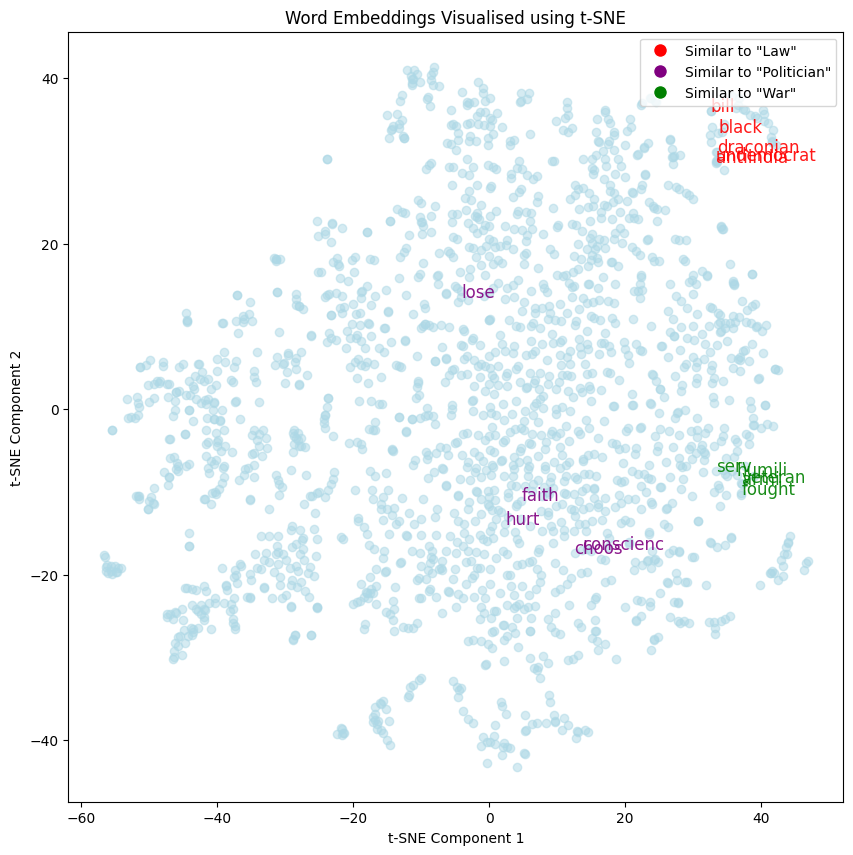

In [56]:
similar_words_1 = model.wv.most_similar('law', topn=5)
print(similar_words_1)
similar_words_2 = model.wv.most_similar('politician', topn=5)
print(similar_words_2)
similar_words_3 = model.wv.most_similar('war', topn=5)
print(similar_words_3)


words1 = set(word for word, _ in similar_words_1)
words2 = set(word for word, _ in similar_words_2)
words3 = set(word for word, _ in similar_words_3)
words_to_label = list(words1.union(words2).union(words3))

# Extract word vectors
X = model.wv[model.wv.index_to_key]
X_tsne = TSNE(n_components=2).fit_transform(X)

# Create the scatter plot
plt.figure(figsize=(10, 10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.5, color="lightblue")

# Add labels for the selected words with different colors
for i, word in enumerate(model.wv.index_to_key):
    if word in words_to_label:
        if word in words1:
            color = 'red'  
        elif word in words2:
            color = 'purple' 
        elif word in words3:
            color = 'green' 
        else:
            color = 'black'

        plt.annotate(word, (X_tsne[i, 0], X_tsne[i, 1]), fontsize=12, alpha=0.9, color=color)

# Create legend
red_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Similar to "Law"')
purple_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='purple', markersize=10, label='Similar to "Politician"')
green_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Similar to "War"')
plt.legend(handles=[red_patch, purple_patch, green_patch], loc='upper right')

plt.title("Word Embeddings Visualised using t-SNE")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()